## ML_Groupwork:
### Data_processing:

**Read data from the csv file**

In [43]:
import pandas as pd
import numpy as np
# import drawing libraries
import matplotlib.pyplot as plt
import seaborn as sns
# read data from csv
df = pd.read_csv("dly532.csv",na_values=" ")
df.head()

,date,maxtp,mintp,igmin,gmin,cbl,wdsp,hm,ddhm,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd,Rainy
0,1-Jan-01,10.9,4.6,0,1.5,965.7,10.0,18,190,26,0.4,0.0,175.0,4.800,0.5,0.6,0.0,-1.0,-10.0,1
1,2-Jan-01,8.9,1.0,1,-0.2,972.0,9.7,20,280,29,0.0,0.0,154.0,5.025,0.4,0.5,0.0,-1.2,-10.0,1
2,3-Jan-01,7.8,1.1,1,-1.0,977.0,10.3,16,220,23,0.1,0.0,119.0,3.300,0.4,0.5,0.0,-4.3,-10.0,1
3,4-Jan-01,6.9,-0.2,1,-0.5,975.5,6.1,12,250,16,0.5,0.0,196.0,3.925,0.1,0.1,0.0,0.0,-9.5,-1
4,5-Jan-01,2.2,-1.3,1,-5.7,977.4,7.1,14,250,19,0.0,0.0,170.0,2.575,0.1,0.1,0.0,0.0,-9.1,-1


In [44]:
# Show data shape
df.shape

(7609, 20)

**Check null value in the data**

In [46]:
df.isna().any(axis=0)

date      False
maxtp     False
mintp     False
igmin     False
gmin       True
cbl       False
wdsp      False
hm        False
ddhm      False
hg        False
sun       False
dos        True
g_rad      True
soil      False
pe        False
evap       True
smd_wd    False
smd_md    False
smd_pd    False
Rainy     False
dtype: bool

From this we could see that there is missing value in gmin, dos, g_rad and evap. And here I would use the mean value to fill in the missing value.

In [47]:
df['gmin'].fillna(df['gmin'].mean(),inplace=True)
df['dos'].fillna(df['dos'].mean(),inplace=True)
df['g_rad'].fillna(df['g_rad'].mean(),inplace=True)
df['evap'].fillna(df['evap'].mean(),inplace=True)

After filling in the missing value, check the missing value again.

In [48]:
df.isna().any(axis=0)

date      False
maxtp     False
mintp     False
igmin     False
gmin      False
cbl       False
wdsp      False
hm        False
ddhm      False
hg        False
sun       False
dos       False
g_rad     False
soil      False
pe        False
evap      False
smd_wd    False
smd_md    False
smd_pd    False
Rainy     False
dtype: bool

<AxesSubplot:xlabel='Rainy', ylabel='count'>

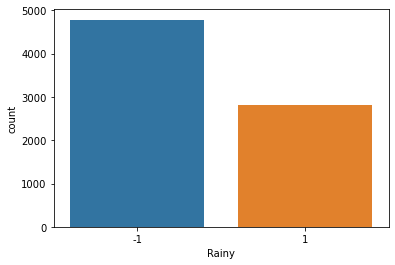

In [71]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['Rainy'])

Text(0.5, 1.0, 'Correlation HeatMap')

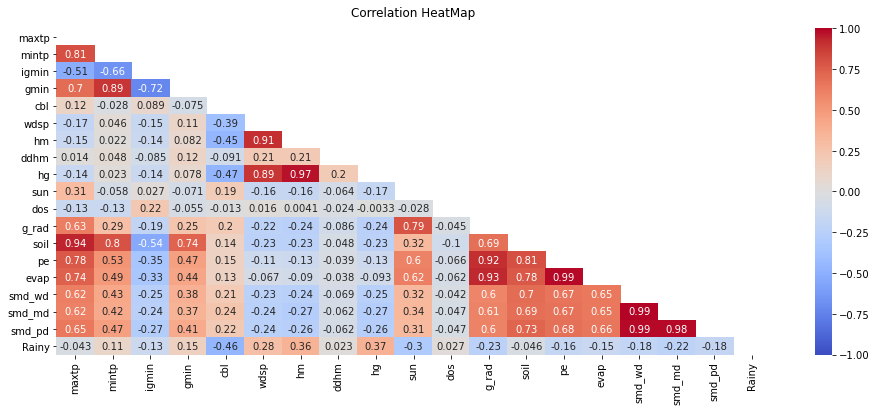

In [50]:
df.drop(columns="date")
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = df.iloc[:,1:18]
plt.figure(figsize=(16, 6))

np.triu(np.ones_like(df.corr()))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1,cmap='coolwarm', annot=True)
heatmap.set_title('Correlation HeatMap', fontdict={'fontsize':12}, pad=12)

From the correlation heatmap, we could see soil, maxtp and mintp have a strong correlation. hm,hg and ddhm have a strong correlation. And smd_wd,smd_md,smd_pd have a strong correlation. So
we should consider deleting some columns from them to avoid the effect of covariance on the fit.

### Handling outliers
**Drawing box plots to identify ourliers in the numerical columns**

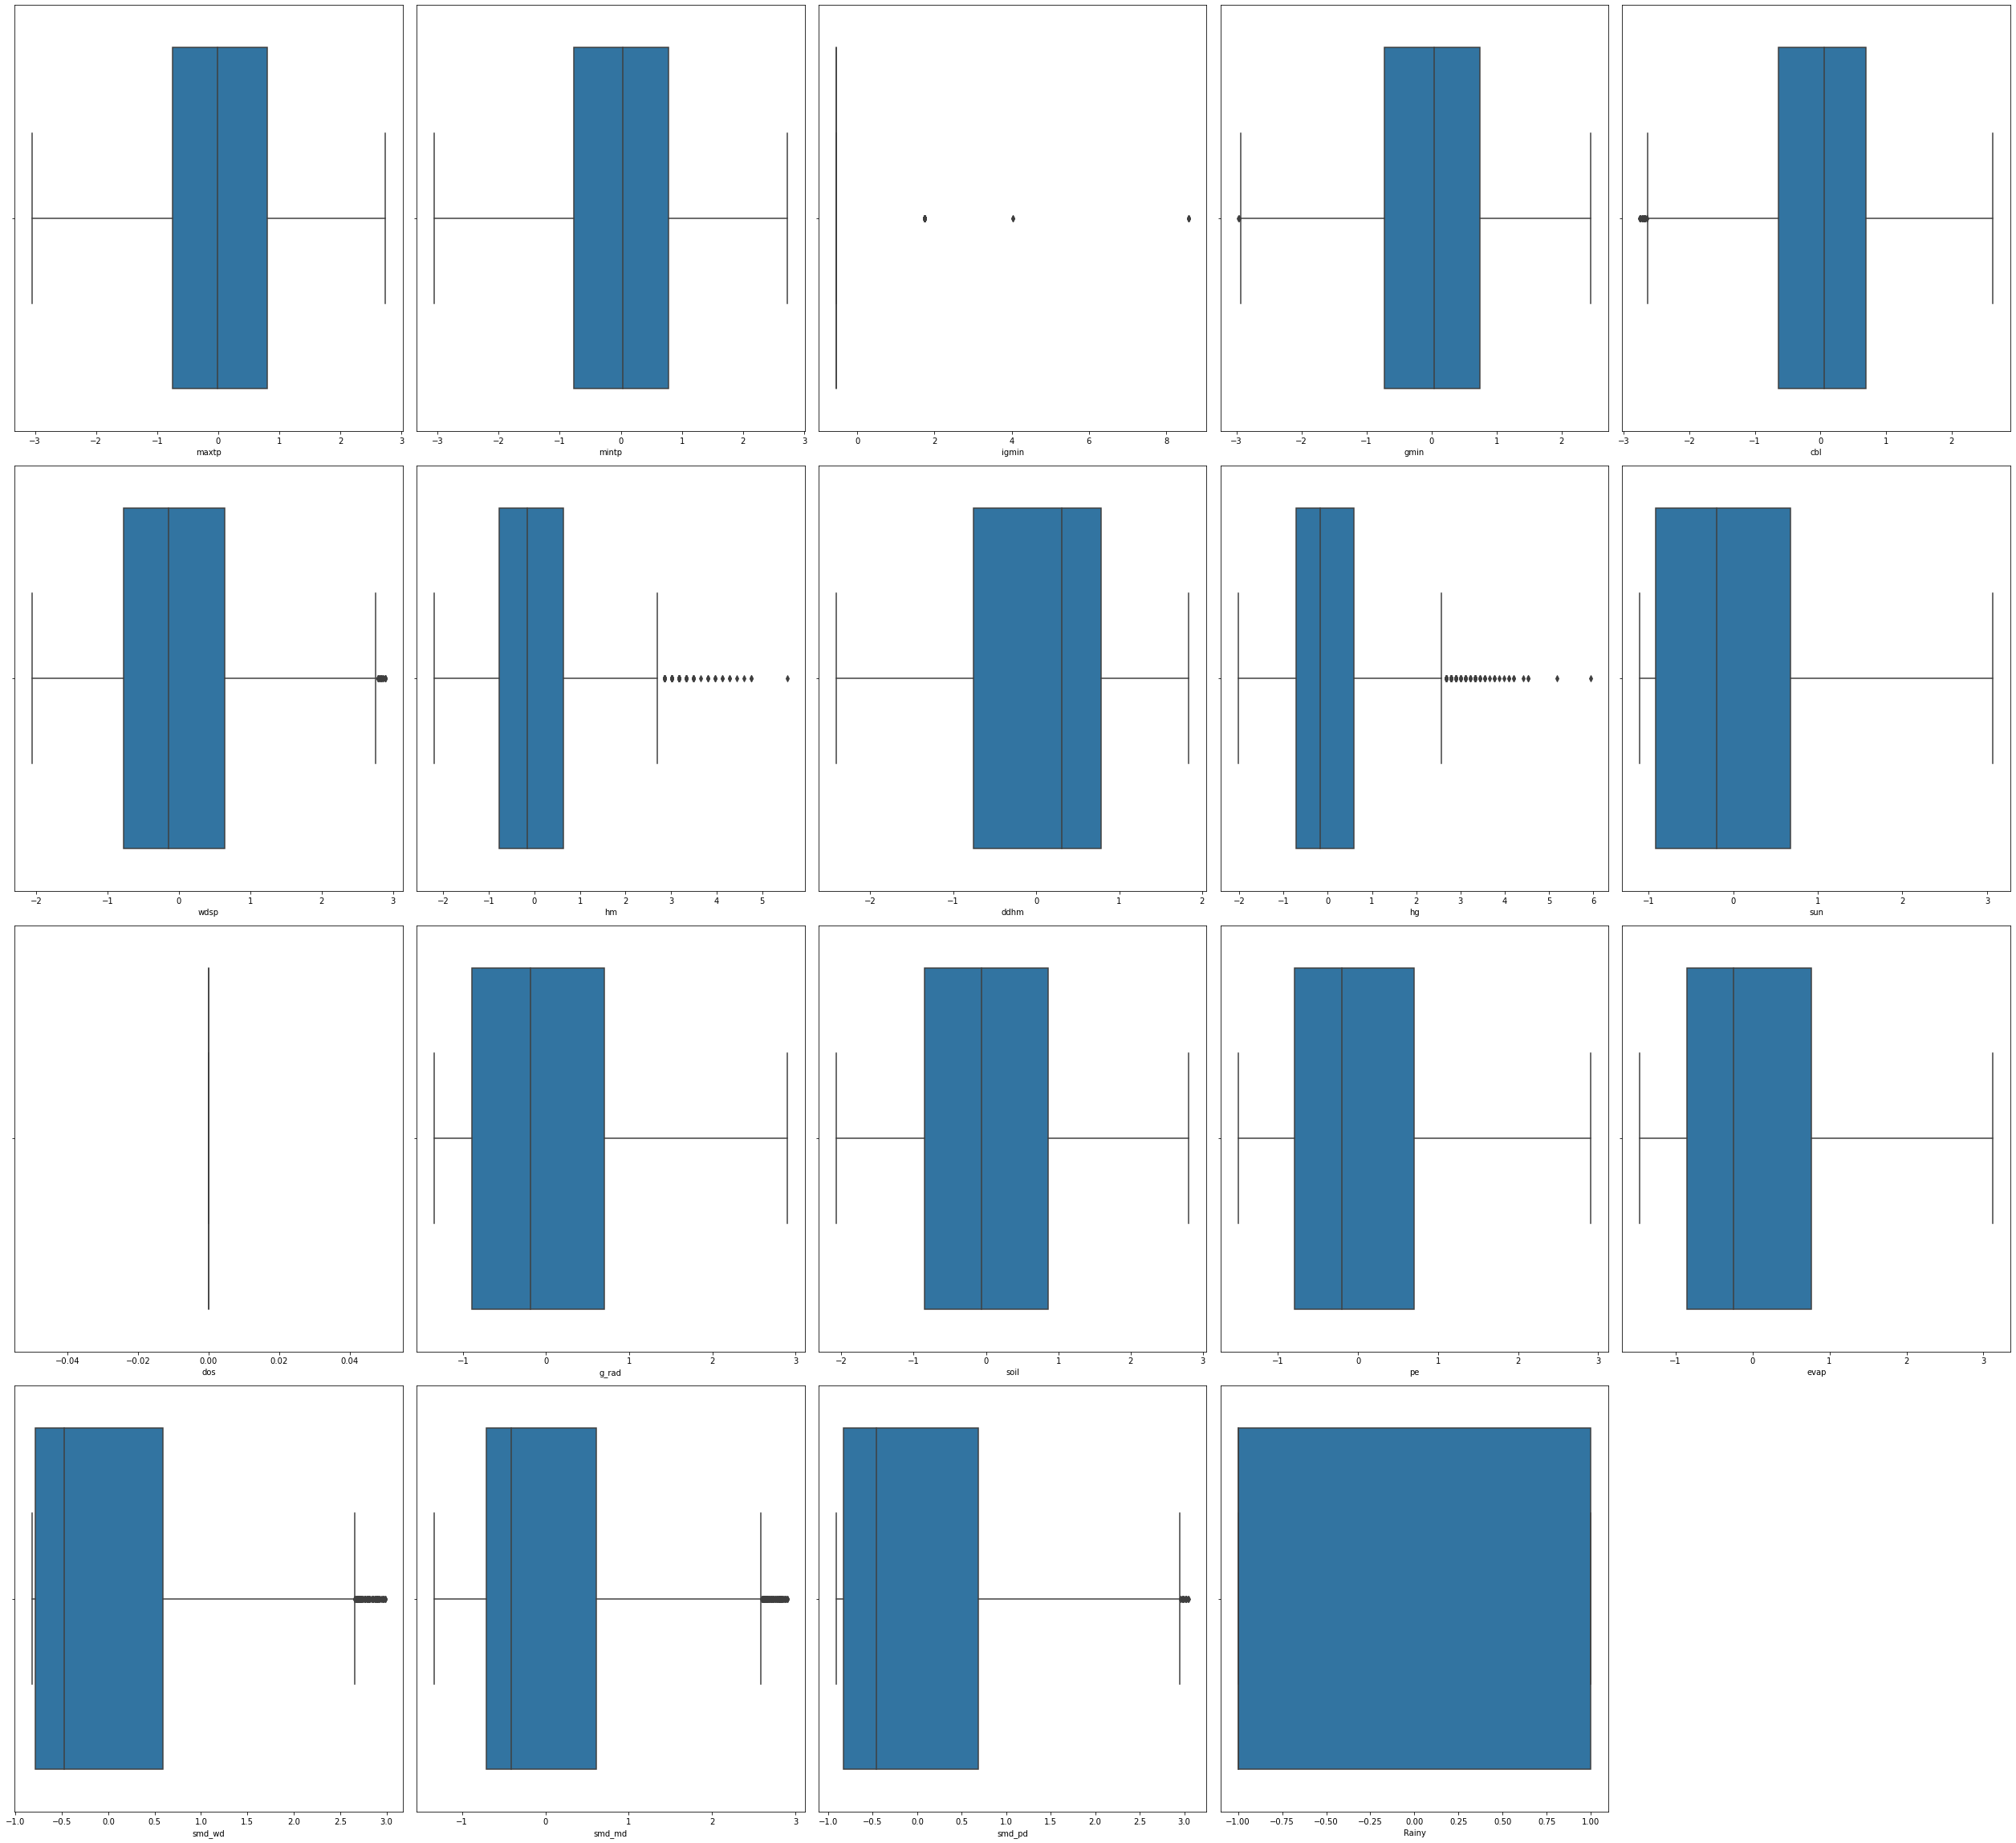

In [69]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
a=4
b=5
c=1
fig = plt.figure(figsize=(35,32))
for i in df:
    if df[i].dtype=='float64':
        plt.subplot(a, b, c)
        sns.boxplot(df[i])
        c = c+1
    if df[i].dtype=='int64':
        plt.subplot(a, b, c)
        sns.boxplot(df[i])
        c = c+1
    else:
        continue
plt.tight_layout()
plt.show()  

Remove the outliers

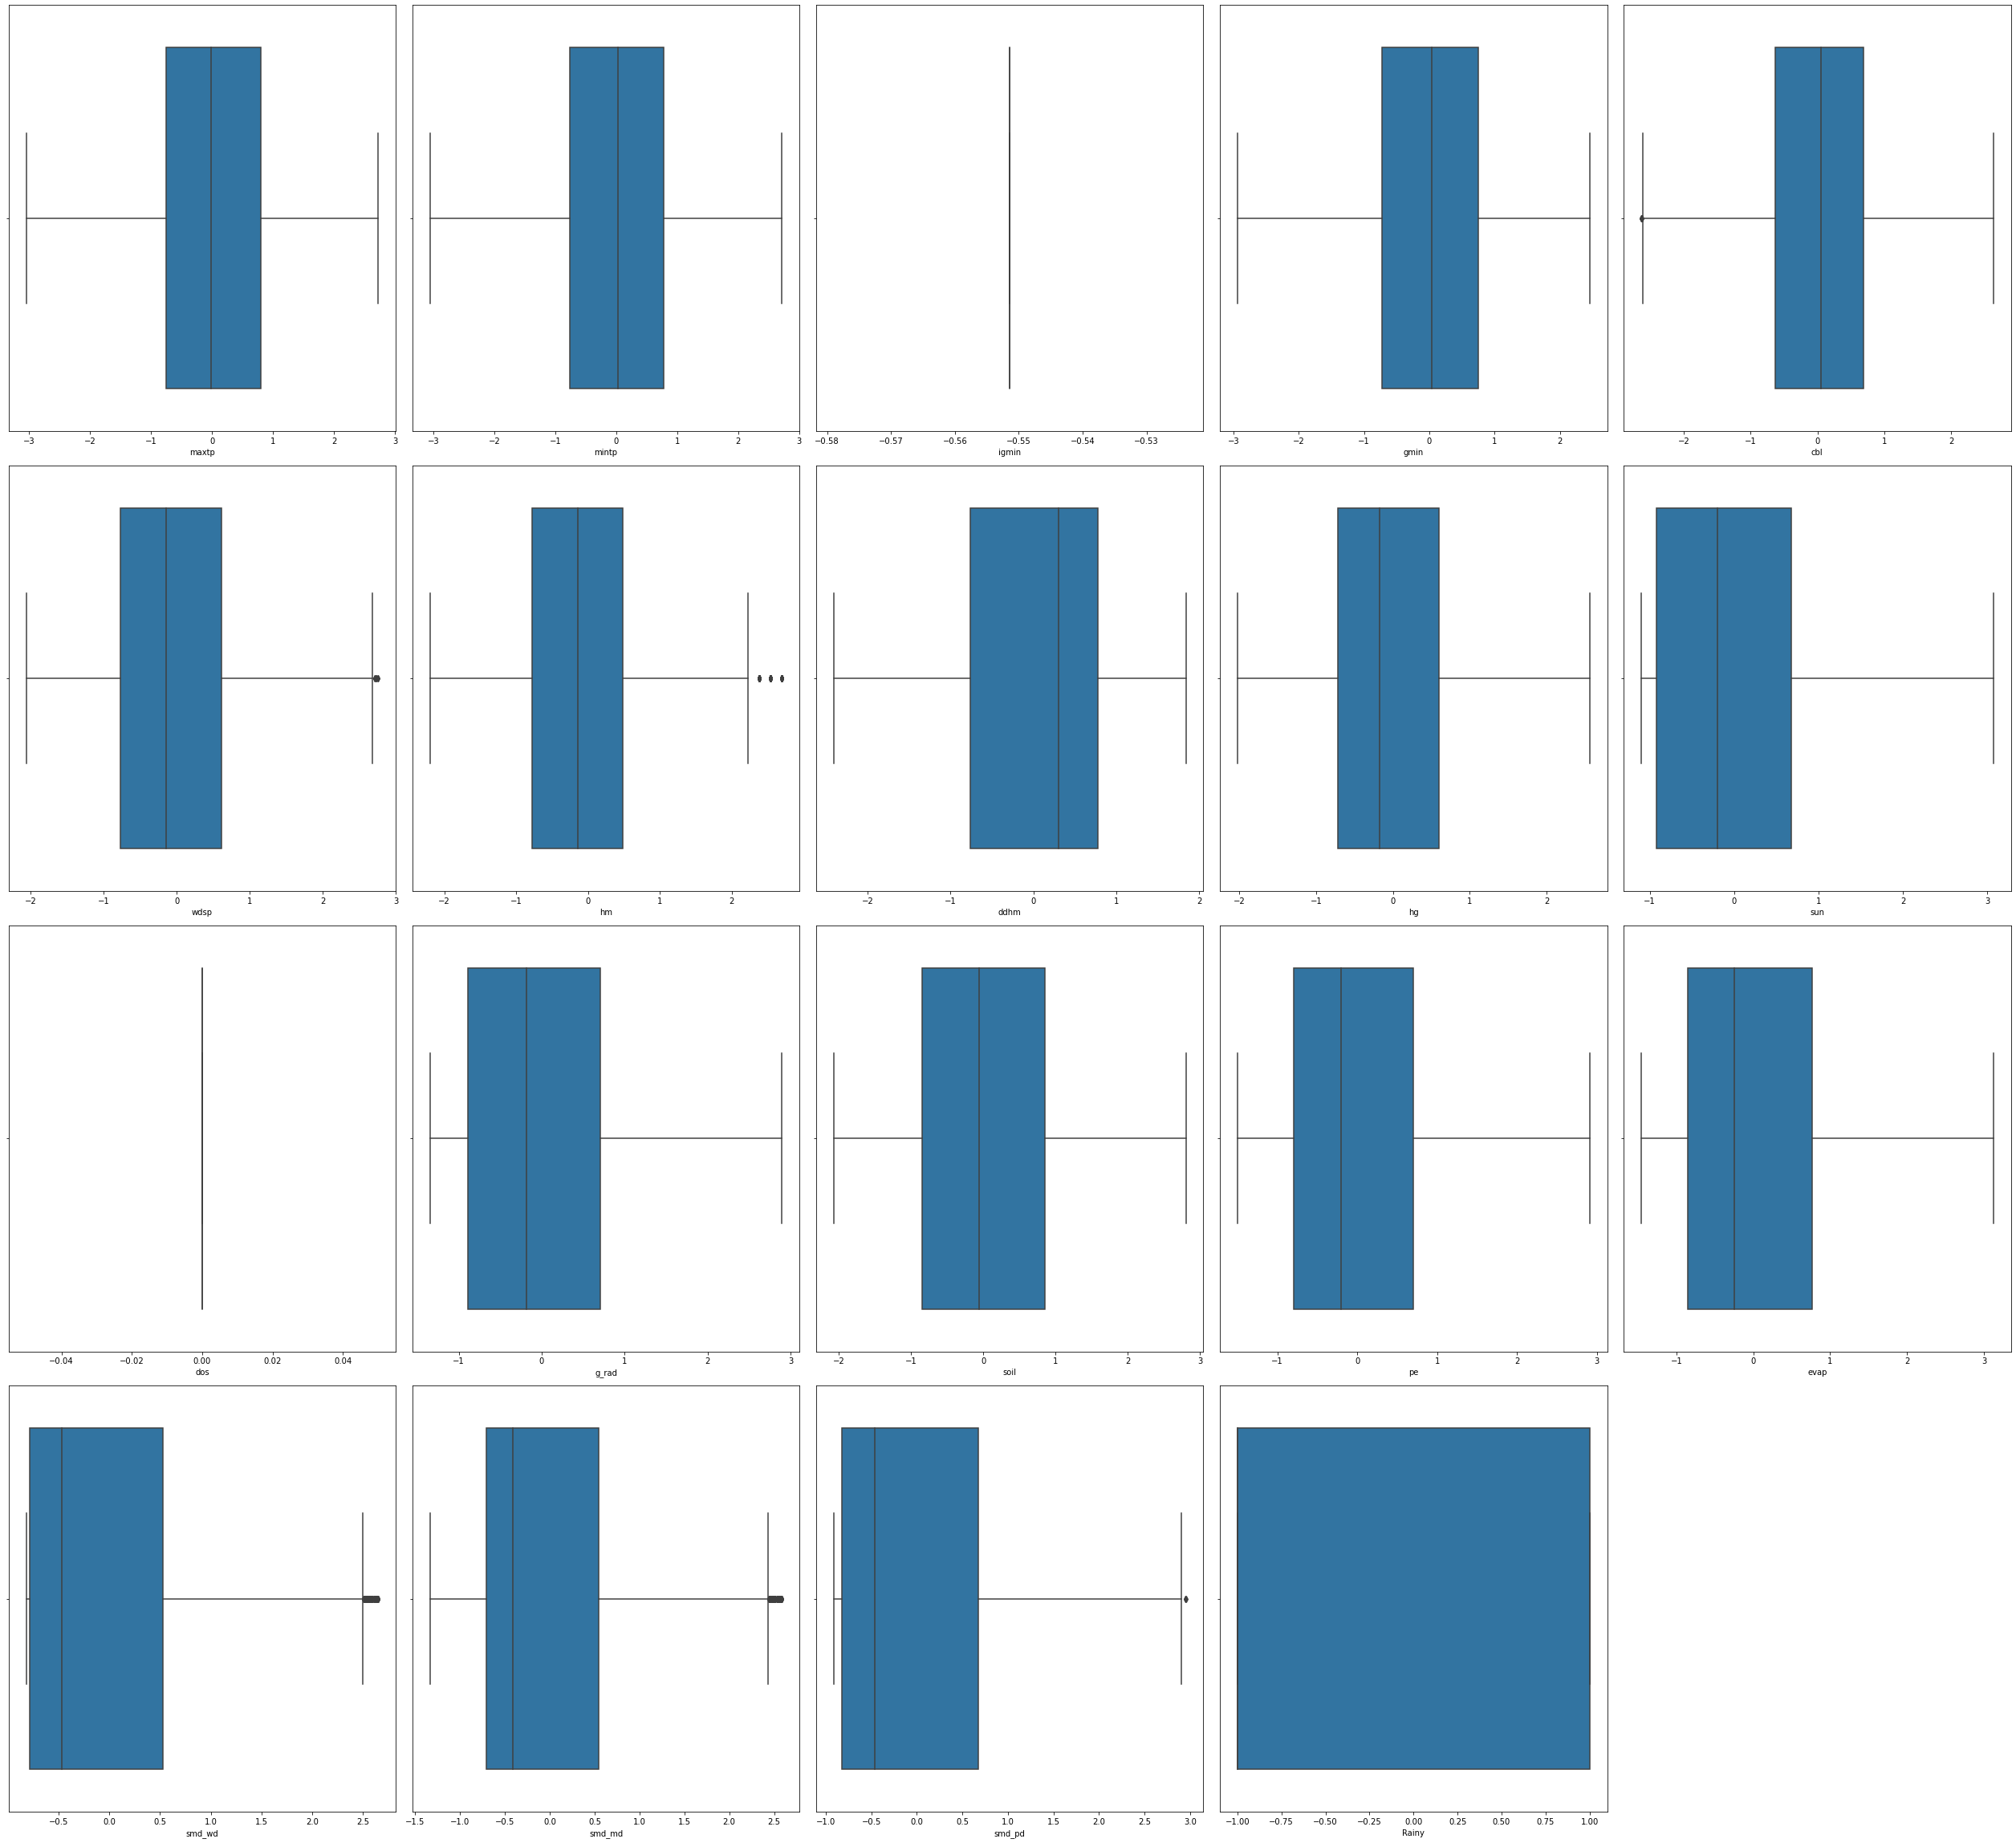

In [70]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
# Removing outliers
# Replace with mean value
for i in df:
    if df[i].dtype=='float64':
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        med = np.median(df[i])
        for j in df[i]:
            if j > Upper_tail or j < Lower_tail:
                df[i] = df[i].replace(j, med)
    else:
        continue
a=4
b=5
c=1
fig = plt.figure(figsize=(35,32))
for i in df:
    if df[i].dtype=='float64':
        plt.subplot(a, b, c)
        sns.boxplot(df[i])
        c = c+1
    if df[i].dtype=='int64':
        plt.subplot(a, b, c)
        sns.boxplot(df[i])
        c = c+1
    else:
        continue
plt.tight_layout()
plt.show()  

In [66]:
# Standardized processing
cols=list(df.iloc[:,1:19])   # Choose list of columns to process
for item in cols:
    mean_tmp = np.mean(np.array(df[item]))
    std_tmp = np.std(np.array(df[item]))
    if(std_tmp):
        df[item] = df[item].apply(lambda x: (x - mean_tmp) / std_tmp)
df.head()



,date,maxtp,mintp,igmin,gmin,cbl,wdsp,hm,ddhm,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd,Rainy
0,1-Jan-01,-0.525519,-0.278503,-0.551418,-0.486273,0.054531,-0.065727,0.012108,-0.167602,0.048593,-0.994612,0.0,-1.119708,-1.107668,-0.998213,-1.055388,-0.82197,-0.800930,-0.912620,1
1,2-Jan-01,-0.932265,-1.071608,1.733844,-0.804392,0.054531,-0.141446,0.328170,0.895625,0.376088,-1.100837,0.0,-1.149078,-1.064451,-1.098399,-1.122762,-0.82197,-0.812822,-0.912620,1
2,3-Jan-01,-1.155975,-1.049578,1.733844,-0.954095,-2.386691,0.009991,-0.303953,0.186807,-0.278902,-1.074281,0.0,-1.198028,-1.395777,-1.098399,-1.122762,-0.82197,-0.997144,-0.912620,1
3,4-Jan-01,-1.339010,-1.335977,1.733844,-0.860530,-2.521317,-1.050065,-0.936076,0.541216,-1.043058,-0.968055,0.0,-1.090338,-1.275732,-1.398957,-1.392257,-0.82197,-0.741471,-0.890064,-1
4,5-Jan-01,-2.294862,-1.578314,1.733844,-1.833600,-2.350790,-0.797671,-0.620015,0.541216,-0.715563,-1.100837,0.0,-1.126701,-1.535030,-1.398957,-1.392257,-0.82197,-0.741471,-0.872019,-1
